# Social Media Analytics Project on Cristiano Ronaldo’s Transfer to Al Nassr

Academic project based on course materials.


## 1. Introduction and Objective

Public reactions to Cristiano Ronaldo’s transfer to Al Nassr are analyzed using Instagram comments.  
Text mining techniques are applied to clean the text, study word patterns, measure sentiment, identify hidden topics, extract the most relevant keywords, and group comments into clusters.  
The objective is to identify dominant themes, sentiment patterns, and audience narratives around the transfer.


## 2. Setup and Libraries


In [3]:
# Import packages
import csv
import numpy as np
import nltk 
import re
import pandas as pd
import networkx as nx
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Teresa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Teresa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Teresa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## 3. Data Loading and Basic Exploration


In [5]:
#Load data
df = pd.read_csv('cleaned_comments_data.csv')
df.head()

comment_like_count content_type    created_at  created_at_for_fb_app  \
0                 0.0      comment  1.718475e+09             1718474520   
1                 0.0      comment  1.718475e+09             1718474519   
2                 0.0      comment  1.718470e+09             1718470414   
3                 0.0      comment  1.718467e+09             1718467392   
4                 0.0      comment  1.718456e+09             1718456281   

   created_at_utc  did_report_as_spam  has_liked_comment hashtags  \
0      1718474520               False              False       []   
1      1718474519               False              False       []   
2      1718470414               False              False       []   
3      1718467392               False              False       []   
4      1718456281               False              False       []   

                  id inline_composer_display_condition  ...  \
0  18027760394126785                             never  ...   
1  17843565195242387                             never  ...   
2  18038383510770632                             never  ...   
3  18039081547917137                             never  ...   
4  17891264541030792                             never  ...   

   giphy_media_info.images.fixed_height.width  giphy_media_info.is_sticker  \
0                                         NaN                          NaN   
1                                         NaN                          NaN   
2                                         NaN                          NaN   
3                                         NaN                          NaN   
4                                         NaN                          NaN   

   giphy_media_info.title giphy_media_info.username has_translation  \
0                     NaN                       NaN             NaN   
1                     NaN                       NaN             NaN   
2                     NaN                       NaN             NaN   
3                     NaN                       NaN             NaN   
4                     NaN                       NaN             NaN   

   avatar_media_info.avatar_sticker_cdn_url  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   avatar_media_info.avatar_sticker_ikid avatar_media_info.type  \
0                                    NaN                    NaN   
1                                    NaN                    NaN   
2                                    NaN                    NaN   
3                                    NaN                    NaN   
4                                    NaN                    NaN   

   replied_to_comment_id  reply_root_comment_id  
0                    NaN                    NaN  
1                    NaN                    NaN  
2                    NaN                    NaN  
3                    NaN                    NaN  
4                    NaN                    NaN  

[5 rows x 49 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4254 entries, 0 to 4253
Data columns (total 49 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   comment_like_count                              4254 non-null   float64
 1   content_type                                    4254 non-null   object 
 2   created_at                                      4254 non-null   float64
 3   created_at_for_fb_app                           4254 non-null   int64  
 4   created_at_utc                                  4254 non-null   int64  
 5   did_report_as_spam                              4254 non-null   bool   
 6   has_liked_comment                               4254 non-null   bool   
 7   hashtags                                        4254 non-null   object 
 8   id                                              4254 non-null   int64  
 9   inline_composer_display_condition        

In [7]:
df.describe()

comment_like_count    created_at  created_at_for_fb_app  \
count         4254.000000  4.254000e+03           4.254000e+03   
mean             0.269158  1.717588e+09           1.717588e+09   
std              3.900563  1.967014e+05           1.967014e+05   
min              0.000000  1.717426e+09           1.717426e+09   
25%              0.000000  1.717460e+09           1.717460e+09   
50%              0.000000  1.717512e+09           1.717512e+09   
75%              0.000000  1.717635e+09           1.717635e+09   
max            203.000000  1.718475e+09           1.718475e+09   

       created_at_utc            id   like_count  private_reply_status  \
count    4.254000e+03  4.254000e+03  4254.000000                4254.0   
mean     1.717588e+09  1.804363e+16     0.269158                   0.0   
std      1.967014e+05  1.333829e+14     3.900563                   0.0   
min      1.717426e+09  1.784206e+16     0.000000                   0.0   
25%      1.717460e+09  1.796790e+16     0.000000                   0.0   
50%      1.717512e+09  1.802621e+16     0.000000                   0.0   
75%      1.717635e+09  1.806114e+16     0.000000                   0.0   
max      1.718475e+09  1.845153e+16   203.000000                   0.0   

              type       user_id  user.fbid_v2  ...  user.latest_reel_media  \
count  4254.000000  4.254000e+03  4.254000e+03  ...            4.254000e+03   
mean      0.165961  3.987549e+10  1.784144e+16  ...            2.819646e+08   
std       0.551771  2.507047e+10  2.507039e+10  ...            6.365005e+08   
min       0.000000  1.749721e+06  1.784140e+16  ...            0.000000e+00   
25%       0.000000  8.285339e+09  1.784141e+16  ...            0.000000e+00   
50%       0.000000  5.070301e+10  1.784145e+16  ...            0.000000e+00   
75%       0.000000  6.128371e+10  1.784146e+16  ...            0.000000e+00   
max       2.000000  6.748598e+10  1.784147e+16  ...            1.718481e+09   

       user.profile_pic_id  giphy_media_info.images.fixed_height.height  \
count         3.835000e+03                                        214.0   
mean          3.203460e+18                                        200.0   
std           3.188348e+17                                          0.0   
min           1.251384e+18                                        200.0   
25%           3.193504e+18                                        200.0   
50%           3.334819e+18                                        200.0   
75%           3.377871e+18                                        200.0   
max           3.391170e+18                                        200.0   

       giphy_media_info.images.fixed_height.mp4_size  \
count                                   2.140000e+02   
mean                                    2.430905e+05   
std                                     2.267715e+05   
min                                     1.005400e+04   
25%                                     1.189700e+05   
50%                                     1.653710e+05   
75%                                     3.131510e+05   
max                                     1.097284e+06   

       giphy_media_info.images.fixed_height.size  \
count                               2.140000e+02   
mean                                9.816683e+05   
std                                 8.326221e+05   
min                                 9.573000e+03   
25%                                 4.712680e+05   
50%                                 8.583510e+05   
75%                                 1.110913e+06   
max                                 3.976592e+06   

       giphy_media_info.images.fixed_height.webp_size  \
count                                    2.140000e+02   
mean                                     3.986027e+05   
std                                      3.133178e+05   
min                                      1.078000e+04   
25%                                      2.092760e+05   
50%                                      

## 4. Overall Conversation Analysis
### 4.1 Frequency analysis and language filtering


In [8]:
!pip install langdetect

In [9]:
# Convert all 'text' column values to strings and drop NaN values
df['text'] = df['text'].astype(str)
df = df.dropna(subset=['text'])

# Ensure reproducibility
DetectorFactory.seed = 0

# Function to detect the language of a comment
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"
    except TypeError:
        return "unknown"

# Detect the language of each comment
df['language'] = df['text'].apply(detect_language)
print("Detected languages:")
print(df['language'].value_counts())

Detected languages:
language
unknown    1586
en          796
tl          280
ar          261
pt          201
es          120
fi          104
de          104
so           93
ro           77
fa           71
it           62
id           60
cy           55
fr           47
et           35
sw           33
tr           31
cs           22
nl           20
vi           20
hr           19
no           19
ca           18
da           17
sl           15
af           14
hu           12
ur           11
pl           10
sk            9
lt            6
sv            5
ru            4
hi            3
th            3
ko            2
sq            2
mr            1
ne            1
ja            1
he            1
lv            1
bn            1
zh-cn         1
Name: count, dtype: int64


In [10]:
# Filter to only keep English comments
english_comments = df[df['language'] == 'en']

# Combine all English into a single string
combined_text_english = ' '.join(english_comments['text'])

# Tokenize the text
word_tokens_english = word_tokenize(combined_text_english)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words_english = [w.lower() for w in word_tokens_english if w.isalpha() and w.lower() not in stop_words]
print("First few filtered English words:")
print(filtered_words_english[:50])

First few filtered English words:
['history', 'history', 'never', 'repeats', 'come', 'ipl', 'fail', 'sir', 'al', 'nasr', 'failed', 'penalty', 'shootout', 'neymar', 'play', 'next', 'world', 'cup', 'lord', 'siuu', 'cristiano', 'best', 'football', 'world', 'best', 'also', 'king', 'football', 'hilali', 'respect', 'ronaldo', 'need', 'worlcup', 'need', 'euro', 'cup', 'dream', 'meet', 'son', 'messi', 'goat', 'repeat', 'ronaldo', 'love', 'akwaghmare', 'love', 'much', 'end', 'best', 'world']


In [11]:
# Initialize and apply the stemmer
ps = PorterStemmer()
stemmed_words_english = [ps.stem(w) for w in filtered_words_english]
print("First few stemmed English words:")
print(stemmed_words_english[:50])

First few stemmed English words:
['histori', 'histori', 'never', 'repeat', 'come', 'ipl', 'fail', 'sir', 'al', 'nasr', 'fail', 'penalti', 'shootout', 'neymar', 'play', 'next', 'world', 'cup', 'lord', 'siuu', 'cristiano', 'best', 'footbal', 'world', 'best', 'also', 'king', 'footbal', 'hilali', 'respect', 'ronaldo', 'need', 'worlcup', 'need', 'euro', 'cup', 'dream', 'meet', 'son', 'messi', 'goat', 'repeat', 'ronaldo', 'love', 'akwaghmar', 'love', 'much', 'end', 'best', 'world']


In [12]:
# Count the frequency of words
word_freq_english = Counter(stemmed_words_english)
print("Most common English words:")
print(word_freq_english.most_common(10))

Most common English words:
[('best', 112), ('goat', 83), ('love', 64), ('ronaldo', 59), ('cristiano', 55), ('world', 48), ('footbal', 37), ('come', 34), ('euro', 34), ('player', 34)]


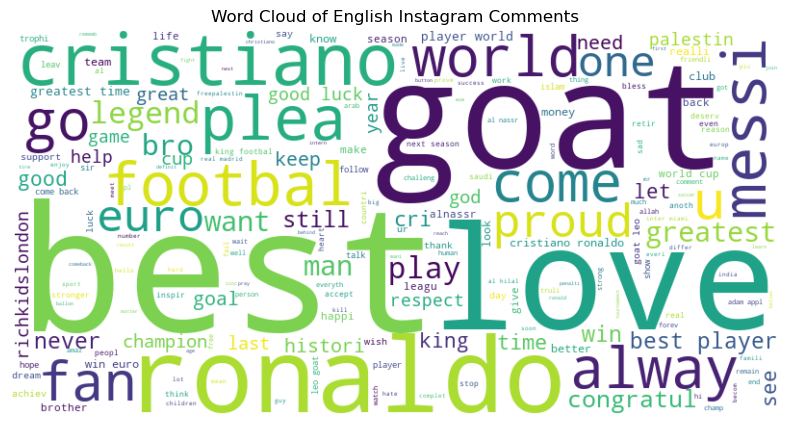

In [13]:
# Generate a word cloud for English comments
wordcloud_english = WordCloud(width=800, height=400, background_color='white').generate(' '.join(stemmed_words_english))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_english, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of English Instagram Comments')
plt.show()

### 4.2 Sentiment analysis of all comments


In [14]:
# Get sentiment of a comment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Sentiment Analysis for English Comments
english_comments['sentiment'] = english_comments['text'].apply(get_sentiment)
print("DataFrame with Sentiment Scores for English Comments:")
print(english_comments[['text', 'sentiment']])

DataFrame with Sentiment Scores for English Comments:
                                                   text  sentiment
10     You are the history And history never repeats 🙌🔥   0.000000
21                              Come in RCB.win the IPL   0.000000
22    You didn't fail sir Al Nasr failed in the pena...  -0.500000
23                                         The GOAT🐐🐐🐐🐐   0.000000
26                                 Neymar is the best❤️   0.000000
...                                                 ...        ...
4218  Cristiano Ronaldo  you sad someone Doesn't hav...   0.414286
4232                     Living Legend beast himself 🐐👑   0.000000
4236                         See this @manchesterunited   0.000000
4238  @alnassr hire a few more Brazilians to help th...   0.150000
4240                                  My favorit player   0.000000

[796 rows x 2 columns]


C:\Users\Teresa\AppData\Local\Temp\ipykernel_12568\1873472062.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_comments['sentiment'] = english_comments['text'].apply(get_sentiment)


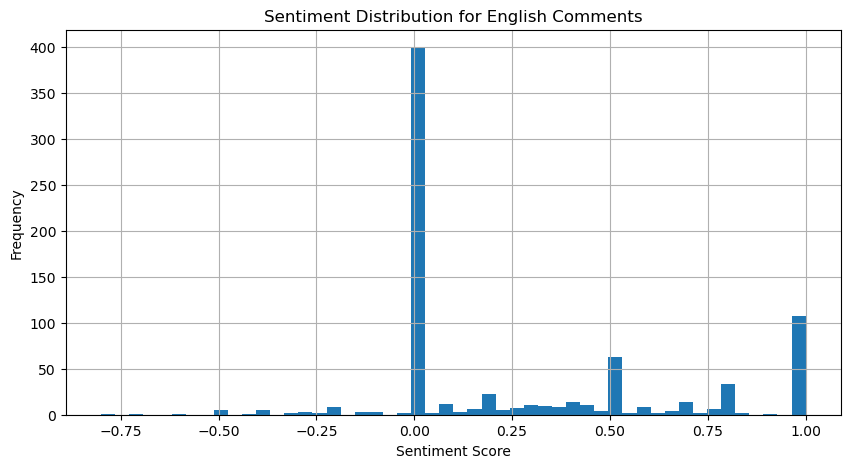

In [15]:
# Plot the sentiment distribution for English comments
plt.figure(figsize=(10, 5))
english_comments['sentiment'].hist(bins=50)
plt.title('Sentiment Distribution for English Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Separate the comments by sentiment
positive_comments = english_comments[english_comments['sentiment'] > 0.5]['text']
negative_comments = english_comments[english_comments['sentiment'] < -0.5]['text']
neutral_comments = english_comments[english_comments['sentiment'] == 0]['text']

positive_text = ' '.join(positive_comments)
negative_text = ' '.join(negative_comments)
neutral_text = ' '.join(neutral_comments)

# Tokenize and remove stop words
stop_words = set(stopwords.words('english'))
positive_tokens = word_tokenize(positive_text)
negative_tokens = word_tokenize(negative_text)
neutral_tokens = word_tokenize(neutral_text)

In [17]:
# Extract comments with high positive sentiment
positive_comments = english_comments[english_comments['sentiment'] > 0.5]['text']
print("Positive Comments:")
print(positive_comments.head(10))


Positive Comments:
41     Best football in the world best best👑 and also...
119                    The best in the world of football
124           Insha allah you will win the euro in 2024🐐
164                               Great at all time...❤️
216                Like That Picture You Sims Very Happy
268    You are best player in histoiry football ⚽🥅 🐐🇵...
271                                             The Best
299                 Am proud 👏 cr7 never fails hes club👑
369                     The greatest man in history 🐐🐐🐐👑
386                                         Proud of you
Name: text, dtype: object


### 4.3 Interim takeaways

English comments are dominated by supportive fan language. Words like best, goat, love, ronaldo, and cristiano indicate admiration.  
Sentiment is mostly neutral, with a clear positive tail and very few strong negatives. Many short or emoji based comments are likely classified as neutral by the model.  

The next section focuses on comments that mention Ronaldo or Al Nassr to examine themes and sentiment in more detail.


## 5. Focused Analysis on Al Nassr and Cristiano Ronaldo


### 5.1 Filter comments for the focus topic


In [18]:
# Filter comments to include only those mentioning Cristiano Ronaldo and Al-Nassr
keywords = ['Ronaldo', 'Al-Nassr']
df_al_nassr = df[df['text'].str.contains('|'.join(keywords), case=False, na=False)]

In [20]:
# Apply preprocessing
df_al_nassr['cleaned_text'] = df_al_nassr['text'].apply(preprocess_text)

# Apply sentiment analysis
df_al_nassr['sentiment'] = df_al_nassr['cleaned_text'].apply(get_sentiment)

# Ensure the sentiment column is categorized into positive, negative, and neutral
df_al_nassr['sentiment_category'] = pd.cut(df_al_nassr['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])

# Check the results
df_al_nassr[['text', 'cleaned_text', 'sentiment', 'sentiment_category']].head()

C:\Users\Teresa\AppData\Local\Temp\ipykernel_12568\2951669567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_al_nassr['cleaned_text'] = df_al_nassr['text'].apply(preprocess_text)
C:\Users\Teresa\AppData\Local\Temp\ipykernel_12568\2951669567.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_al_nassr['sentiment'] = df_al_nassr['cleaned_text'].apply(get_sentiment)
C:\Users\Teresa\AppData\Local\Temp\ipykernel_12568\2951669567.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

text  \
2                                 My Cristiano Ronaldo   
47                    I’m hilali but I respect Ronaldo   
59   Ronaldo, por favor, note que você é o melhor j...   
65   ❤️❤️pls seee❤️goat ronaldo🐐❤️❤️❤️❤️❤️❤️❤️🐐🐐🐐🐐🐐...   
102                                       Ronaldo😢😢😢💛🐐   

                                          cleaned_text  sentiment  \
2                                    cristiano ronaldo        0.0   
47                           im hilali respect ronaldo        0.0   
59   ronaldo por favor note que você é melhor jogad...        0.0   
65                                pls seeegoat ronaldo        0.0   
102                                            ronaldo        0.0   

    sentiment_category  
2              neutral  
47             neutral  
59             neutral  
65             neutral  
102            neutral

### 5.2 Preprocessing and sentiment classification for the focused set


In [23]:
# Filter comments to include only those mentioning Cristiano Ronaldo and Al-Nassr
keywords = ['Ronaldo', 'Al-Nassr']
df_al_nassr = df[df['text'].str.contains('|'.join(keywords), case=False, na=False)]

print("Filtered comments:")
df_al_nassr['text'].head()

Filtered comments:


2                                   My Cristiano Ronaldo
47                      I’m hilali but I respect Ronaldo
59     Ronaldo, por favor, note que você é o melhor j...
65     ❤️❤️pls seee❤️goat ronaldo🐐❤️❤️❤️❤️❤️❤️❤️🐐🐐🐐🐐🐐...
102                                         Ronaldo😢😢😢💛🐐
Name: text, dtype: object

In [24]:
# SApply preprocessing
df_al_nassr['cleaned_text'] = df_al_nassr['text'].apply(preprocess_text)
print("Preprocessed comments:")
df_al_nassr['cleaned_text'].head()

Preprocessed comments:


C:\Users\Teresa\AppData\Local\Temp\ipykernel_12568\4086690171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_al_nassr['cleaned_text'] = df_al_nassr['text'].apply(preprocess_text)


2                                   my cristiano ronaldo
47                      i m hilali but i respect ronaldo
59     ronaldo por favor note que você é o melhor jog...
65                                pls seee goat ronaldo 
102                                             ronaldo 
Name: cleaned_text, dtype: object

In [25]:
#Apply sentiment analysis
df_al_nassr['sentiment'] = df_al_nassr['cleaned_text'].apply(get_sentiment)
print("Sentiment distribution:")
df_al_nassr['sentiment'].value_counts()

C:\Users\Teresa\AppData\Local\Temp\ipykernel_12568\3426493629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_al_nassr['sentiment'] = df_al_nassr['cleaned_text'].apply(get_sentiment)


Sentiment distribution:


sentiment
neutral     81
positive    46
negative     2
Name: count, dtype: int64

In [27]:
print("Negative comments DataFrame:")
negative_comments_df.head()

Negative comments DataFrame:


comment_like_count content_type    created_at  created_at_for_fb_app  \
813                 0.0      comment  1.717690e+09             1717690253   
814                 0.0      comment  1.717690e+09             1717690221   

     created_at_utc  did_report_as_spam  has_liked_comment hashtags  \
813      1717690253               False              False       []   
814      1717690221               False              False       []   

                    id inline_composer_display_condition  ...  \
813  18023382974226550                             never  ...   
814  18030648761059414                             never  ...   

     giphy_media_info.username  has_translation  \
813                        NaN              NaN   
814                        NaN              NaN   

     avatar_media_info.avatar_sticker_cdn_url  \
813                                       NaN   
814                                       NaN   

    avatar_media_info.avatar_sticker_ikid avatar_media_info.type  \
813                                   NaN                    NaN   
814                                   NaN                    NaN   

     replied_to_comment_id  reply_root_comment_id language  \
813                    NaN                    NaN       en   
814                    NaN                    NaN       en   

                                          cleaned_text  sentiment  
813  join inter miami plzz we want to see messi and...   negative  
814  join inter miami plzz we want to see messi and...   negative  

[2 rows x 52 columns]

In [28]:
print("Neutral comments DataFrame:")
neutral_comments_df.head()

Neutral comments DataFrame:


comment_like_count content_type    created_at  created_at_for_fb_app  \
2                   0.0      comment  1.718470e+09             1718470414   
47                  0.0      comment  1.718344e+09             1718343950   
59                  0.0      comment  1.718314e+09             1718314265   
65                  0.0      comment  1.718307e+09             1718306781   
102                 0.0      comment  1.718233e+09             1718233049   

     created_at_utc  did_report_as_spam  has_liked_comment hashtags  \
2        1718470414               False              False       []   
47       1718343950               False              False       []   
59       1718314265               False              False       []   
65       1718306781               False              False       []   
102      1718233049               False              False       []   

                    id inline_composer_display_condition  ...  \
2    18038383510770632                             never  ...   
47   17911047953959599                             never  ...   
59   18053549284650559                             never  ...   
65   18321294454182104                             never  ...   
102  18010088582411231                             never  ...   

     giphy_media_info.username  has_translation  \
2                          NaN              NaN   
47                         NaN              NaN   
59                         NaN             True   
65                         NaN              NaN   
102                        NaN              NaN   

     avatar_media_info.avatar_sticker_cdn_url  \
2                                         NaN   
47                                        NaN   
59                                        NaN   
65                                        NaN   
102                                       NaN   

    avatar_media_info.avatar_sticker_ikid avatar_media_info.type  \
2                                     NaN                    NaN   
47                                    NaN                    NaN   
59                                    NaN                    NaN   
65                                    NaN                    NaN   
102                                   NaN                    NaN   

     replied_to_comment_id  reply_root_comment_id language  \
2                      NaN                    NaN       es   
47                     NaN                    NaN       en   
59                     NaN                    NaN       pt   
65                     NaN                    NaN  unknown   
102                    NaN                    NaN       ro   

                                          cleaned_text  sentiment  
2                                 my cristiano ronaldo    neutral  
47                    i m hilali but i respect ronaldo    neutral  
59   ronaldo por favor note que você é o melhor jog...    neutral  
65                              pls seee goat ronaldo     neutral  
102                                           ronaldo     neutral  

[5 rows x 52 columns]

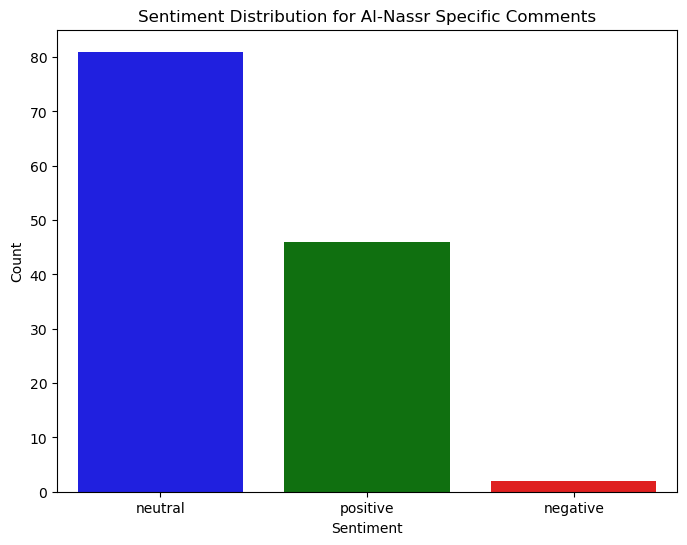

In [30]:
# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df_al_nassr, palette={'neutral': 'blue', 'positive': 'green', 'negative': 'red'})
plt.title('Sentiment Distribution for Al-Nassr Specific Comments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

###  5.3 Most common words by sentiment

C:\Users\Teresa\AppData\Local\Temp\ipykernel_12568\666537065.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_al_nassr['is_english'] = df_al_nassr['cleaned_text'].apply(is_english)


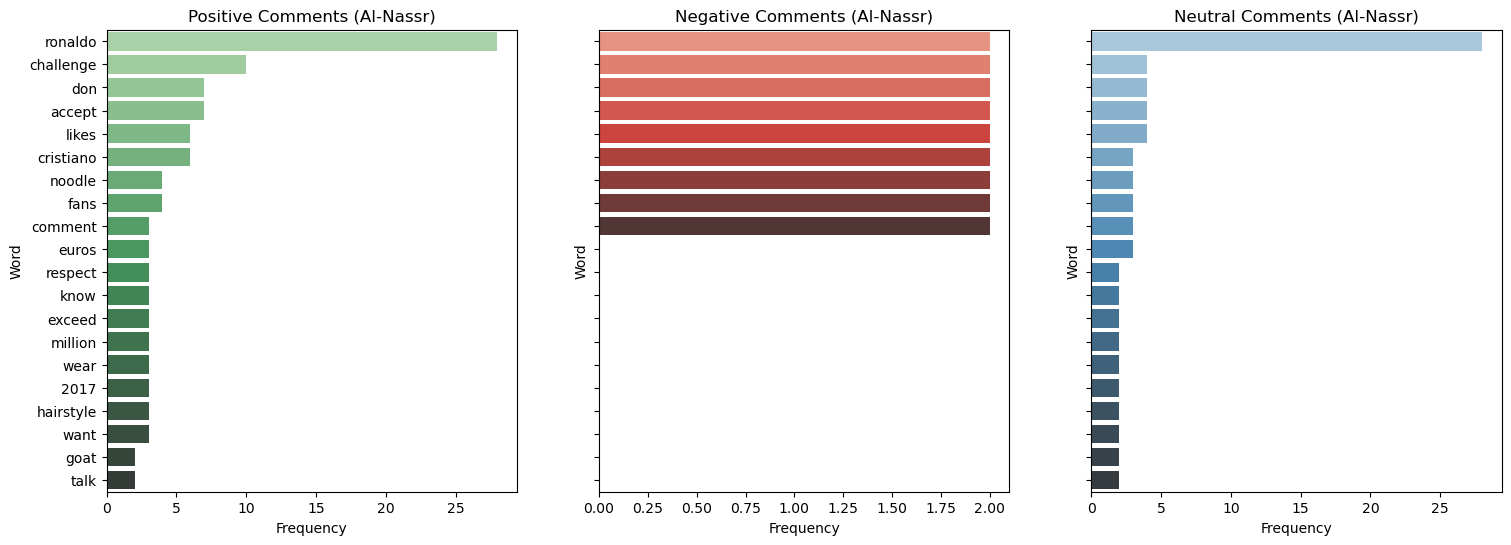

In [36]:
# Function to check if the text is in English
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False
# Apply the function to create the is_english column
df_al_nassr['is_english'] = df_al_nassr['cleaned_text'].apply(is_english)

# Ensure to filter comments to include only English comments
df_al_nassr = df_al_nassr[df_al_nassr['is_english']]

# Separate positive, negative, and neutral comments for Al-Nassr specific comments
positive_comments_al_nassr = df_al_nassr[df_al_nassr['sentiment'] == 'positive']['cleaned_text']
negative_comments_al_nassr = df_al_nassr[df_al_nassr['sentiment'] == 'negative']['cleaned_text']
neutral_comments_al_nassr = df_al_nassr[df_al_nassr['sentiment'] == 'neutral']['cleaned_text']

# Function to get the most common words
def get_most_common_words(text_series, n=20):
    vec = CountVectorizer(stop_words='english')
    bag_of_words = vec.fit_transform(text_series)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get most common words for Al-Nassr specific comments
common_positive_words_al_nassr = get_most_common_words(positive_comments_al_nassr, n=20)
common_negative_words_al_nassr = get_most_common_words(negative_comments_al_nassr, n=20)
common_neutral_words_al_nassr = get_most_common_words(neutral_comments_al_nassr, n=20)

# Convert to DataFrames for visualization
positive_df_al_nassr = pd.DataFrame(common_positive_words_al_nassr, columns=['Word', 'Frequency'])
negative_df_al_nassr = pd.DataFrame(common_negative_words_al_nassr, columns=['Word', 'Frequency'])
neutral_df_al_nassr = pd.DataFrame(common_neutral_words_al_nassr, columns=['Word', 'Frequency'])

# Plot most common words for Al-Nassr specific comments
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.barplot(x='Frequency', y='Word', data=positive_df_al_nassr, palette='Greens_d', ax=axes[0])
axes[0].set_title('Positive Comments (Al-Nassr)')

sns.barplot(x='Frequency', y='Word', data=negative_df_al_nassr, palette='Reds_d', ax=axes[1])
axes[1].set_title('Negative Comments (Al-Nassr)')

sns.barplot(x='Frequency', y='Word', data=neutral_df_al_nassr, palette='Blues_d', ax=axes[2])
axes[2].set_title('Neutral Comments (Al-Nassr)')

plt.show()


### 5.5 Topic modeling with LDA


In [37]:
from sklearn.decomposition import LatentDirichletAllocation

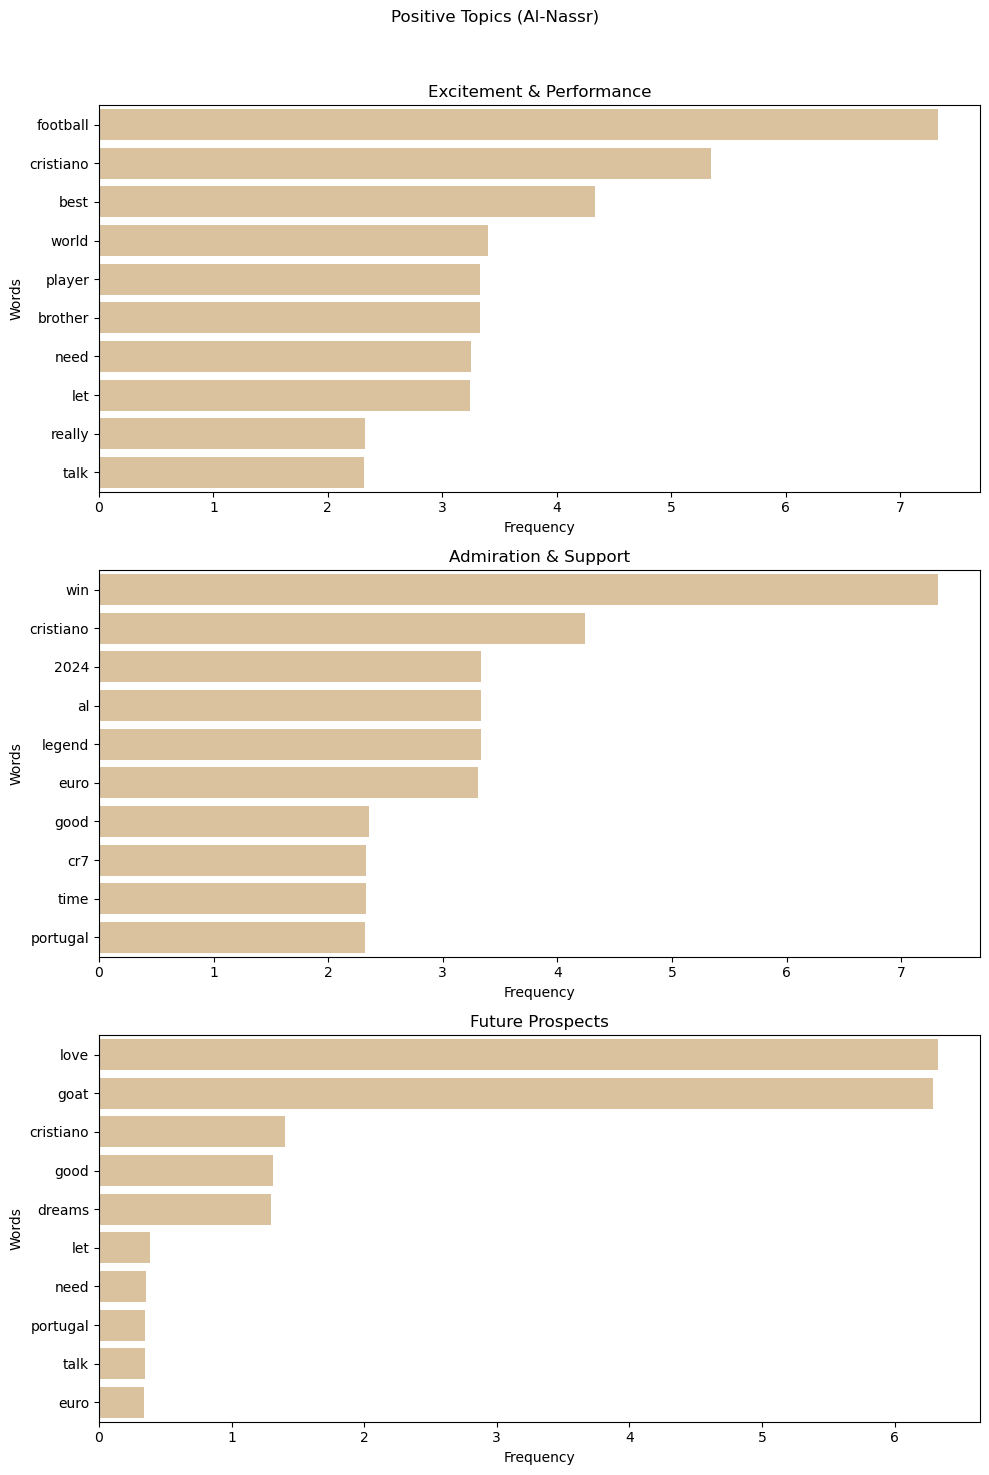

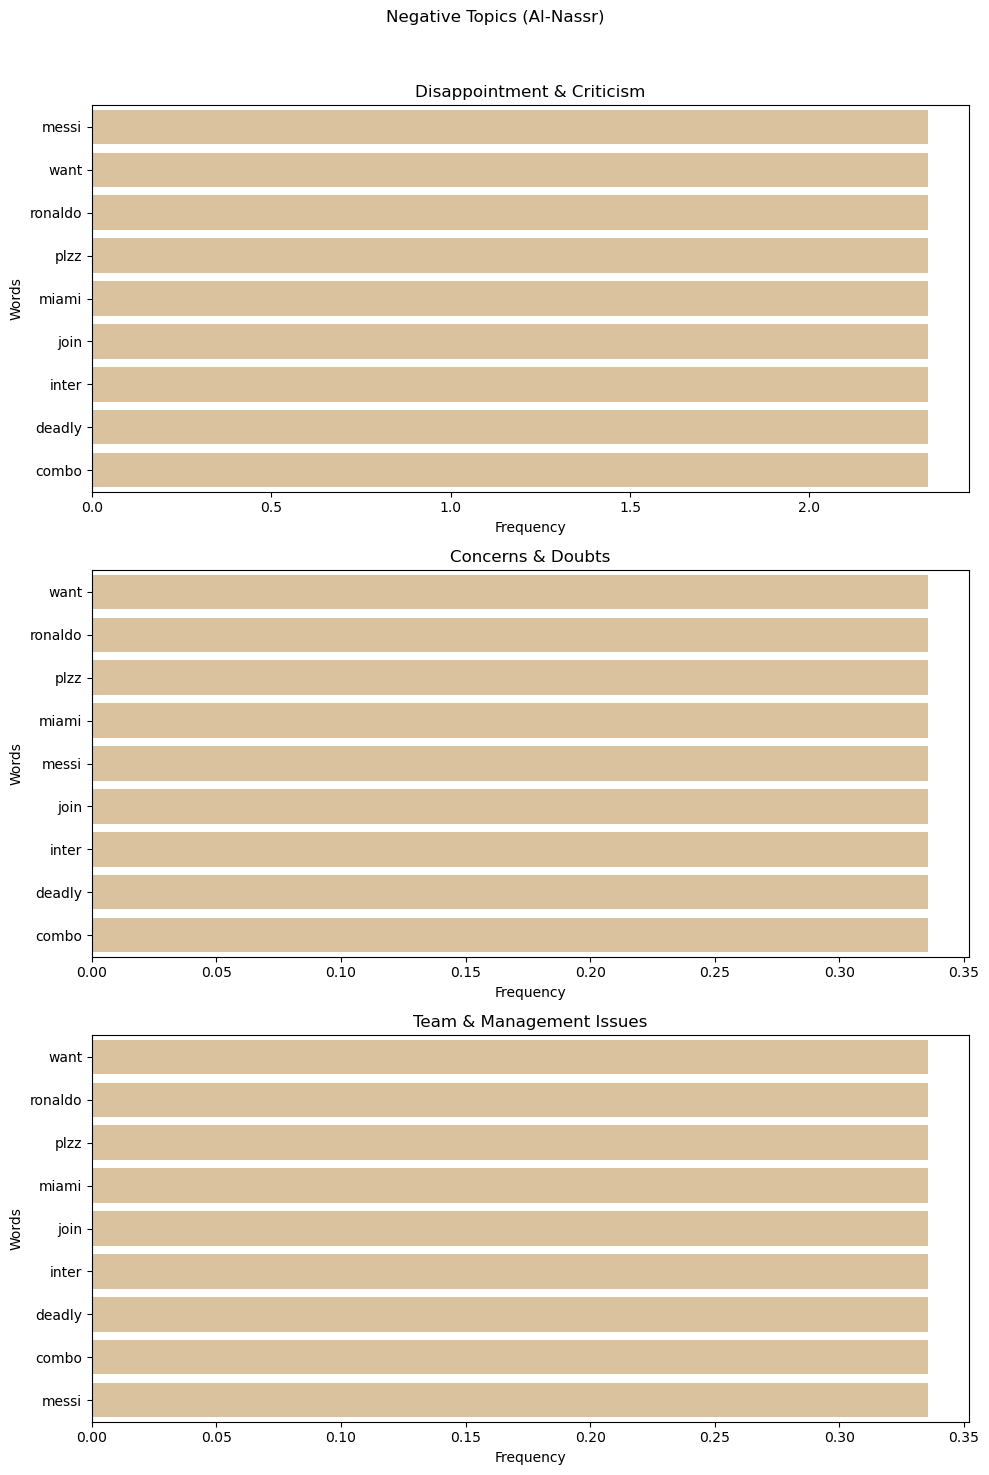

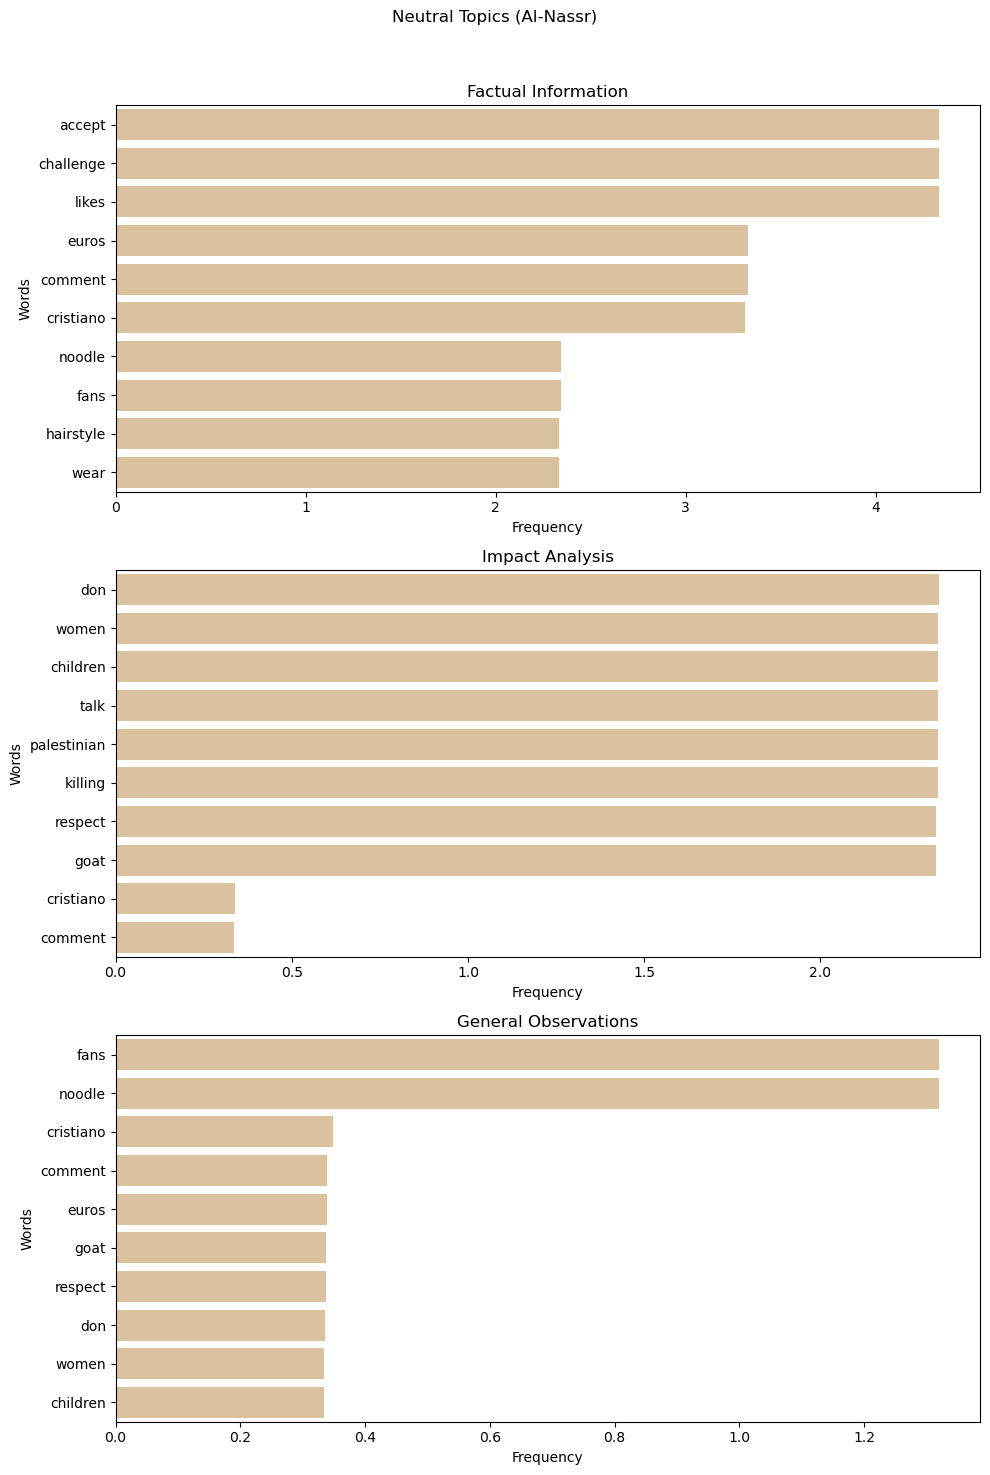

In [38]:
# Ensure all necessary imports are present
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Function to perform topic modeling with dynamic max_df and min_df
def perform_topic_modeling(text_series, n_topics=3, n_words=10):
    num_docs = len(text_series)
    max_df_value = 0.95 if num_docs > 10 else 1.0
    min_df_value = 2 if num_docs > 2 else 1
    
    vectorizer = CountVectorizer(max_df=max_df_value, min_df=min_df_value, stop_words='english')
    text_matrix = vectorizer.fit_transform(text_series)
    
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(text_matrix)
    
    words = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        topic_words = [(words[i], topic[i]) for i in topic.argsort()[:-n_words - 1:-1]]
        topics.append(topic_words)
    return topics

# Function to plot topics with custom labels and beige color palette
def plot_topics(topics, title, labels):
    fig, axes = plt.subplots(len(topics), 1, figsize=(10, len(topics) * 5))
    if len(topics) == 1:
        axes = [axes]
    
    beige_color = '#e5c494'  # Custom beige color
    for i, (topic, label) in enumerate(zip(topics, labels)):
        topic_df = pd.DataFrame(topic, columns=['Word', 'Frequency'])
        sns.barplot(x='Frequency', y='Word', data=topic_df, ax=axes[i], color=beige_color)
        axes[i].set_title(label)
        axes[i].set_xlabel('Frequency')
        axes[i].set_ylabel('Words')
    
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example labels based on hypothetical analysis of topic words
positive_labels = ['Excitement & Performance', 'Admiration & Support', 'Future Prospects']
negative_labels = ['Disappointment & Criticism', 'Concerns & Doubts', 'Team & Management Issues']
neutral_labels = ['Factual Information', 'Impact Analysis', 'General Observations']

# Assuming df_al_nassr is already defined and preprocessed

# Separate positive, negative, and neutral comments
positive_comments_al_nassr = df_al_nassr[df_al_nassr['sentiment'] == 'positive']['cleaned_text']
negative_comments_al_nassr = df_al_nassr[df_al_nassr['sentiment'] == 'negative']['cleaned_text']
neutral_comments_al_nassr = df_al_nassr[df_al_nassr['sentiment'] == 'neutral']['cleaned_text']

# Perform topic modeling for Al-Nassr specific comments
positive_topics_al_nassr = perform_topic_modeling(positive_comments_al_nassr)
negative_topics_al_nassr = perform_topic_modeling(negative_comments_al_nassr)
neutral_topics_al_nassr = perform_topic_modeling(neutral_comments_al_nassr)

# Plot topics for Al-Nassr specific comments with custom labels
plot_topics(positive_topics_al_nassr, 'Positive Topics (Al-Nassr)', positive_labels)
plot_topics(negative_topics_al_nassr, 'Negative Topics (Al-Nassr)', negative_labels)
plot_topics(neutral_topics_al_nassr, 'Neutral Topics (Al-Nassr)', neutral_labels)


### 5.6 N gram analysis


In [39]:
# Function to get top N n-grams
def get_top_n_grams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Function to plot top N n-grams
def plot_top_n_grams(corpus, n=None, ngram_range=(1, 1), title='Top N-grams'):
    top_n_grams = get_top_n_grams(corpus, n, ngram_range)
    top_df = pd.DataFrame(top_n_grams, columns=["Word", "Freq"])
    sns.set(rc={'figure.figsize':(10,8)})
    g = sns.barplot(data=top_df, x="Freq", y="Word" , color='#e5c494' )
    g.set_title(title)
    plt.show()

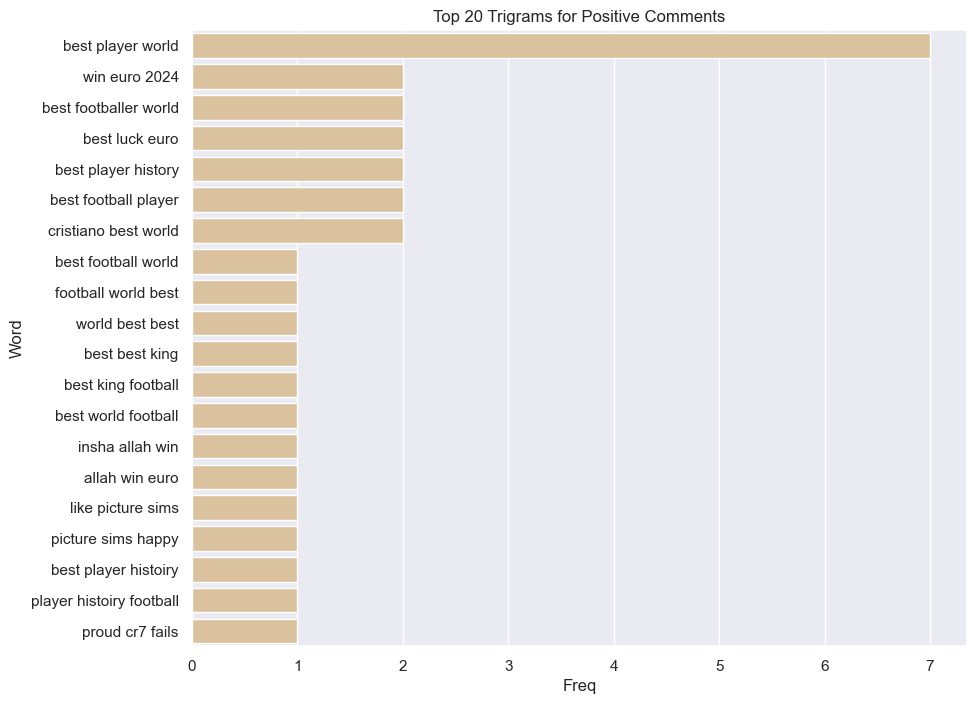

In [40]:
# Plot top 20 trigrams for positive comments
plot_top_n_grams(positive_comments, n=20, ngram_range=(3, 3), title='Top 20 Trigrams for Positive Comments')

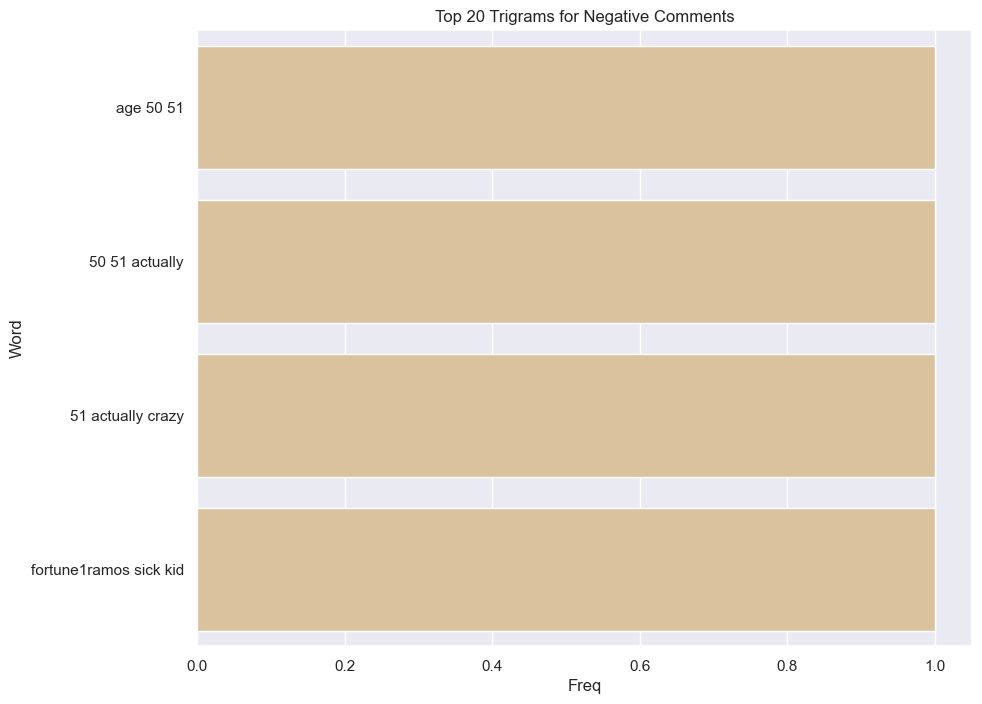

In [41]:
# Plot top 20 trigrams for negative comments
plot_top_n_grams(negative_comments, n=20, ngram_range=(3, 3), title='Top 20 Trigrams for Negative Comments')

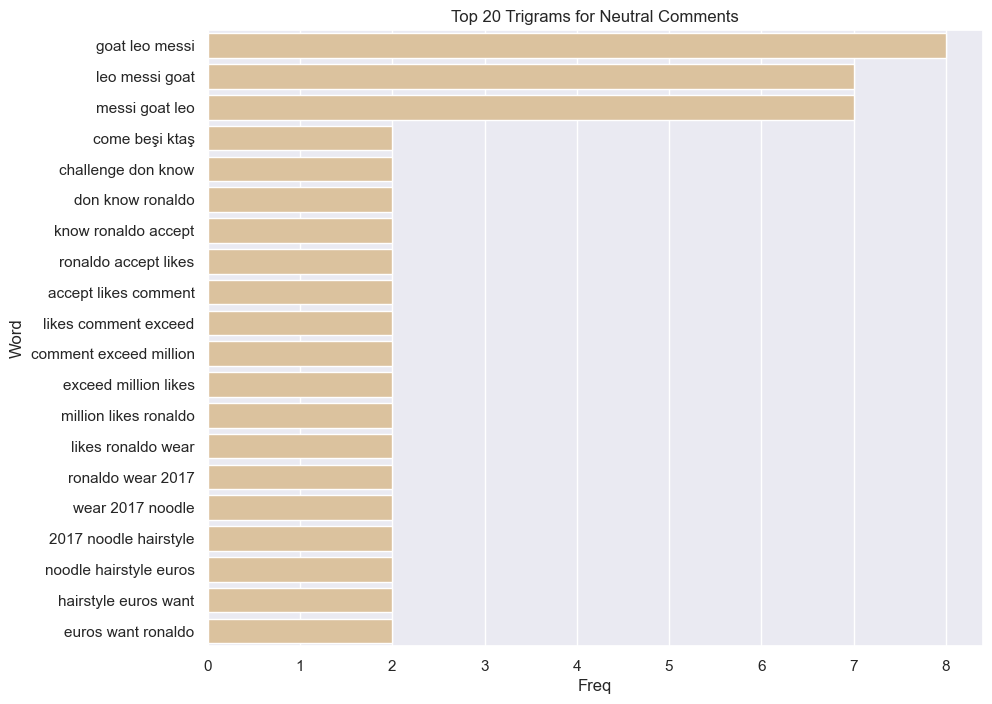

In [42]:
# Plot top 20 trigrams for neutral comments
plot_top_n_grams(neutral_comments, n=20, ngram_range=(3, 3), title='Top 20 Trigrams for Neutral Comments')

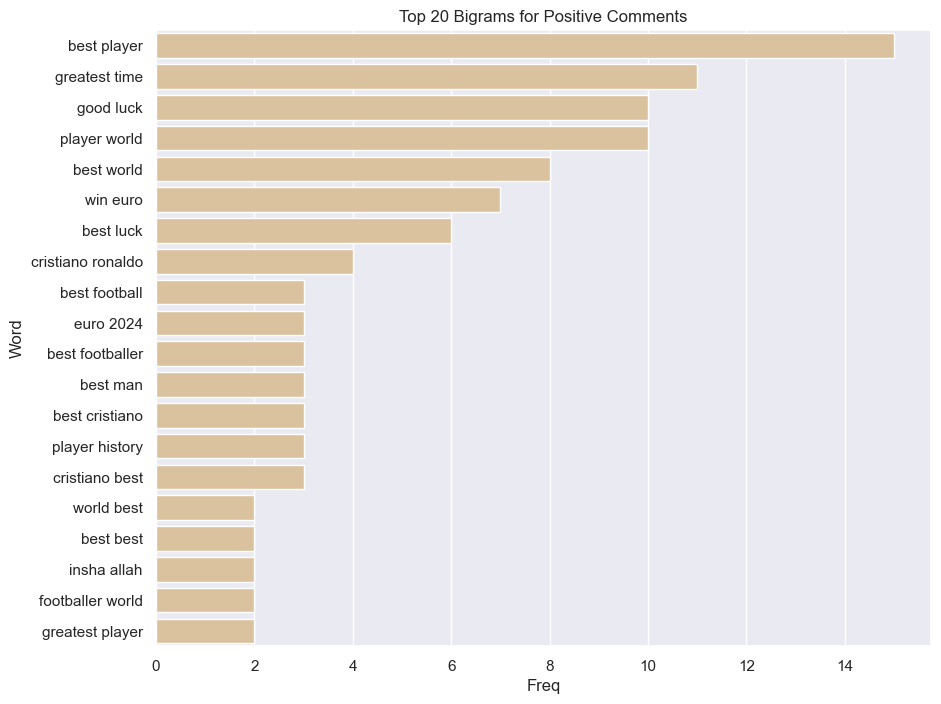

In [43]:
# Plot top 20 bigrams for positive comments
plot_top_n_grams(positive_comments, n=20, ngram_range=(2, 2), title='Top 20 Bigrams for Positive Comments')

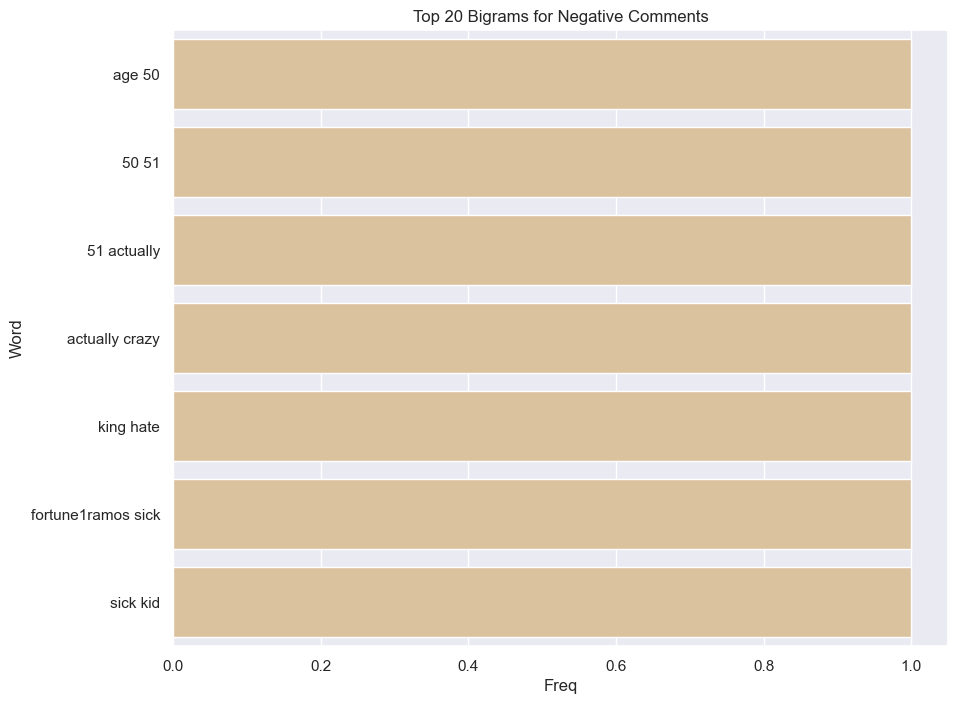

In [44]:
# Plot top 20 bigrams for negative comments
plot_top_n_grams(negative_comments, n=20, ngram_range=(2, 2), title='Top 20 Bigrams for Negative Comments')

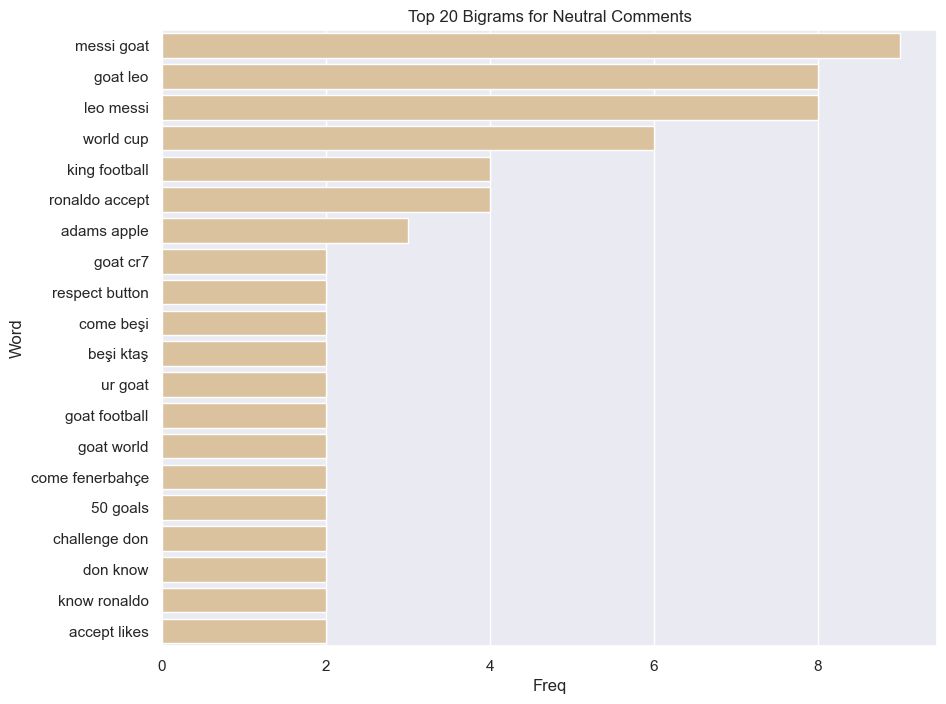

In [45]:
# Plot top 20 bigrams for neutral comments
plot_top_n_grams(neutral_comments, n=20, ngram_range=(2, 2), title='Top 20 Bigrams for Neutral Comments')

### LDA analysis:

To better visualyse **hidden topics** in the comments, we used **LDA** and visualized it with word clouds.

In [46]:
from sklearn.decomposition import LatentDirichletAllocation

## 6. Network and Keyword Analysis

### 6.1 Co occurrence network for positive comments

In [47]:
import pandas as pd
from collections import defaultdict
from nltk.tokenize import word_tokenize
import itertools

# Ensure the 'is_english' column exists
if 'is_english' not in df_al_nassr.columns:
    df_al_nassr['is_english'] = df_al_nassr['language'] == 'en'  # or any other condition you use to determine if a comment is in English

# Function to compute word co-occurrence
def compute_co_occurrence(texts):
    co_occurrence = defaultdict(int)
    for text in texts:
        tokens = word_tokenize(text)
        for token1, token2 in itertools.combinations(tokens, 2):
            if token1 != token2:
                co_occurrence[frozenset([token1, token2])] += 1
    return co_occurrence

# Filter positive English comments
positive_comments = df_al_nassr[(df_al_nassr['sentiment'] == 'positive') & (df_al_nassr['is_english'])]['cleaned_text']

# Compute co-occurrence for positive comments
positive_co_occurrence = compute_co_occurrence(positive_comments)

# Convert co-occurrence to DataFrame
co_occurrence_data = []
for (pair, count) in positive_co_occurrence.items():
    co_occurrence_data.append((*pair, count))

df_co_occurrence = pd.DataFrame(co_occurrence_data, columns=['source', 'target', 'weight'])
df_co_occurrence.head(20)

source      target  weight
0       repeat     ronaldo       1
1       repeat        love       1
2       repeat        from       1
3       repeat  akwaghmare       1
4         love     ronaldo       6
5         from     ronaldo       1
6   akwaghmare     ronaldo       1
7         from        love       1
8         love  akwaghmare       1
9         from  akwaghmare       1
10        love           i       7
11           i           u       2
12           i     ronaldo      15
13        more           i       4
14        than           i       2
15           i        show       2
16       speed           i       2
17          ur           i       2
18         the           i      17
19           i        goat       5

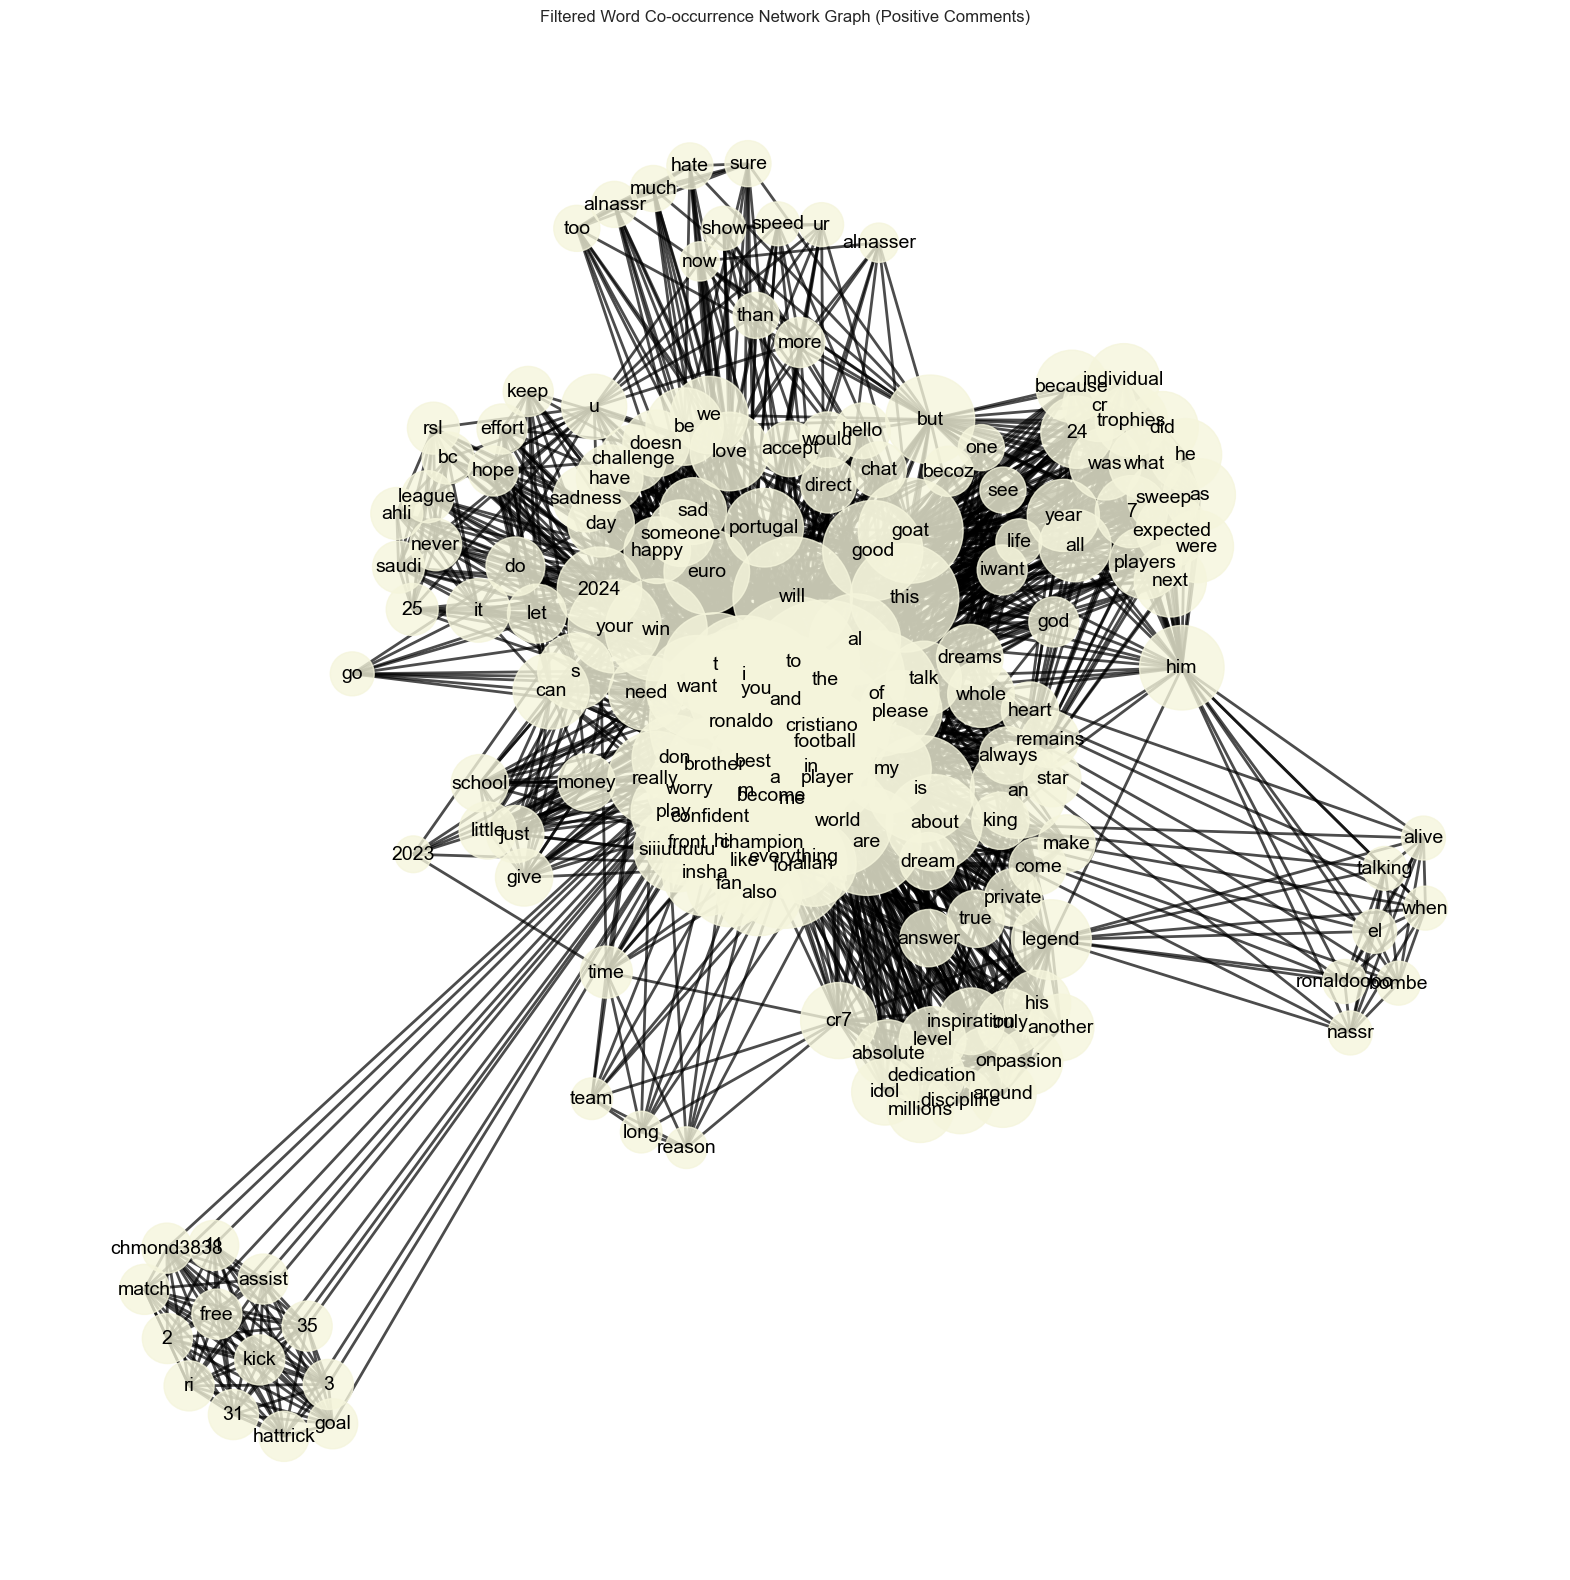

In [48]:
# Function to compute word co-occurrence
def compute_co_occurrence(texts):
    co_occurrence = defaultdict(int)
    for text in texts:
        tokens = word_tokenize(text)
        for token1, token2 in itertools.combinations(tokens, 2):
            if token1 != token2:
                co_occurrence[frozenset([token1, token2])] += 1
    return co_occurrence

# Filter positive English comments
positive_comments = df_al_nassr[(df_al_nassr['sentiment'] == 'positive') & (df_al_nassr['is_english'])]['cleaned_text']

# Compute co-occurrence for positive comments
positive_co_occurrence = compute_co_occurrence(positive_comments)

# Convert co-occurrence to DataFrame
co_occurrence_data = []
for (pair, count) in positive_co_occurrence.items():
    co_occurrence_data.append((*pair, count))
df_co_occurrence = pd.DataFrame(co_occurrence_data, columns=['source', 'target', 'weight'])

# Create a graph from the co-occurrence DataFrame
G = nx.from_pandas_edgelist(df_co_occurrence, 'source', 'target', ['weight'])

# Calculate the degree of each node
node_degree = dict(G.degree())

# Filter out nodes with degree less than a certain threshold
degree_threshold = 5
nodes_to_keep = [node for node, degree in node_degree.items() if degree > degree_threshold]

# Create a subgraph with the filtered nodes
G_filtered = G.subgraph(nodes_to_keep)

# Plot the graph
plt.figure(figsize=(20, 20))
np.random.seed(123)
pos = nx.spring_layout(G_filtered, k=0.1)  # Adjusted layout for better spacing

# Remove the axes
plt.axis('off')

# Get the degree of each node
degree = [val for (node, val) in G_filtered.degree()]

# Draw nodes with sizes proportional to their degree
nx.draw_networkx_nodes(G_filtered, pos, node_color='#F5F5DC', node_size=[x * 100 for x in degree], alpha=0.8)

# Get edge weights and normalize for display
weights = [x / 1000 for x in nx.get_edge_attributes(G_filtered, 'weight').values()]
nx.draw_networkx_edges(G_filtered, pos, width=2, edge_color='black', alpha=0.7)

# Draw labels with better font size
nx.draw_networkx_labels(G_filtered, pos, font_size=14, font_family='sans-serif', font_color='black')

# Display the plot
plt.title('Filtered Word Co-occurrence Network Graph (Positive Comments)')
plt.show()

### 6.2 Co occurrence network for negative comments

In [49]:
from textblob import TextBlob

# Function to determine sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the comments
df_al_nassr['sentiment'] = df_al_nassr['cleaned_text'].apply(get_sentiment)

# Display sentiment counts after analysis
print("Sentiment counts after analysis:")
print(df_al_nassr['sentiment'].value_counts())


Sentiment counts after analysis:
sentiment
positive    28
neutral     25
negative     2
Name: count, dtype: int64


C:\Users\Teresa\AppData\Local\Temp\ipykernel_12568\2982622484.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_al_nassr['sentiment'] = df_al_nassr['cleaned_text'].apply(get_sentiment)


In [50]:
# Function to compute word co-occurrence
def compute_co_occurrence(texts):
    co_occurrence = defaultdict(int)
    for text in texts:
        tokens = word_tokenize(text)
        for token1, token2 in itertools.combinations(tokens, 2):
            if token1 != token2:
                co_occurrence[frozenset([token1, token2])] += 1
    return co_occurrence

# Filter negative English comments
negative_comments = df_al_nassr[(df_al_nassr['sentiment'] == 'negative') & (df_al_nassr['is_english'])]['cleaned_text']

# Check the count of negative comments
print(f"Number of negative comments: {len(negative_comments)}")

# Compute co-occurrence for negative comments
negative_co_occurrence = compute_co_occurrence(negative_comments)

# Convert co-occurrence to DataFrame
co_occurrence_data = []
for (pair, count) in negative_co_occurrence.items():
    co_occurrence_data.append((*pair, count))

df_co_occurrence_negative = pd.DataFrame(co_occurrence_data, columns=['source', 'target', 'weight'])

Number of negative comments: 2


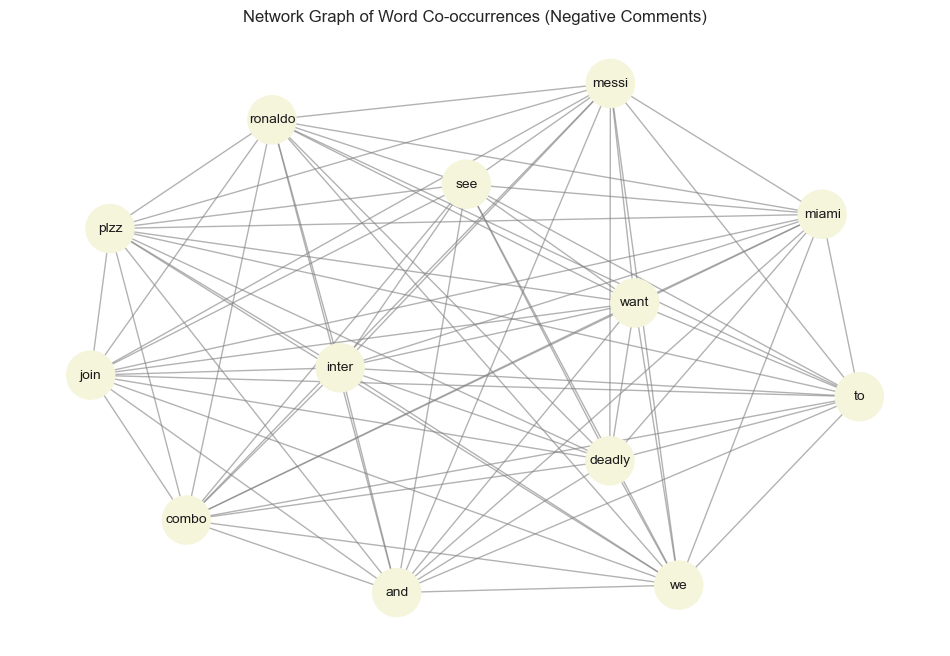

In [51]:
# Check if there are co-occurrences
if df_co_occurrence_negative.empty:
    print("No co-occurrences found for negative comments.")
else:
    # Create a graph from the co-occurrence DataFrame
    G_negative = nx.from_pandas_edgelist(df_co_occurrence_negative, 'source', 'target', ['weight'])

    # Calculate the degree of each node
    node_degree_negative = dict(G_negative.degree())

    # Filter out nodes with degree less than a certain threshold
    degree_threshold = 1
    nodes_to_keep_negative = [node for node, degree in node_degree_negative.items() if degree > degree_threshold]

    # Create a subgraph with the filtered nodes
    G_filtered_negative = G_negative.subgraph(nodes_to_keep_negative)

    # Ensure all nodes have positions
    pos_negative = nx.spring_layout(G_filtered_negative)

    # Redefine node sizes based on filtered graph
    node_degree_filtered_negative = {node: degree for node, degree in G_filtered_negative.degree()}

    # Draw nodes with sizes proportional to their degree
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G_filtered_negative, pos_negative, node_color='#F5F5DC', node_size=[node_degree_filtered_negative[node] * 100 for node in G_filtered_negative.nodes()])
    nx.draw_networkx_edges(G_filtered_negative, pos_negative, edge_color='grey', alpha=0.6)
    nx.draw_networkx_labels(G_filtered_negative, pos_negative, font_size=10)
    # Remove the axes
    plt.axis('off')
    plt.title('Network Graph of Word Co-occurrences (Negative Comments)')
    plt.show()
    
    # Prepare data for heatmap
    words = list(set(itertools.chain.from_iterable([list(pair) for pair, count in negative_co_occurrence.items()])))
    matrix = np.zeros((len(words), len(words)))

    for (pair, count) in negative_co_occurrence.items():
        i, j = words.index(list(pair)[0]), words.index(list(pair)[1])
        matrix[i, j] = count
        matrix[j, i] = count

    # Convert matrix to integer type for heatmap plotting
    matrix = matrix.astype(int)


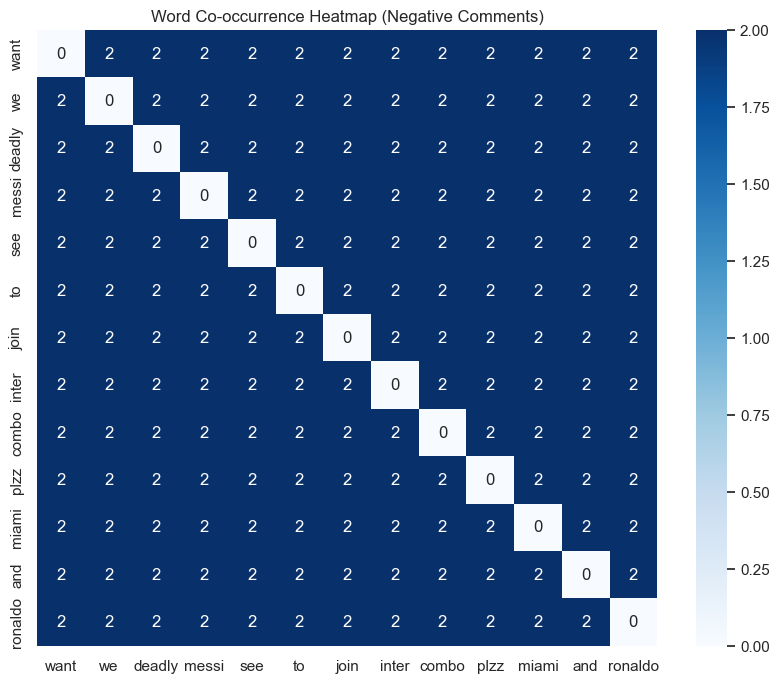

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, xticklabels=words, yticklabels=words, cmap='Blues', annot=True, fmt="d")
plt.title('Word Co-occurrence Heatmap (Negative Comments)')
plt.show()

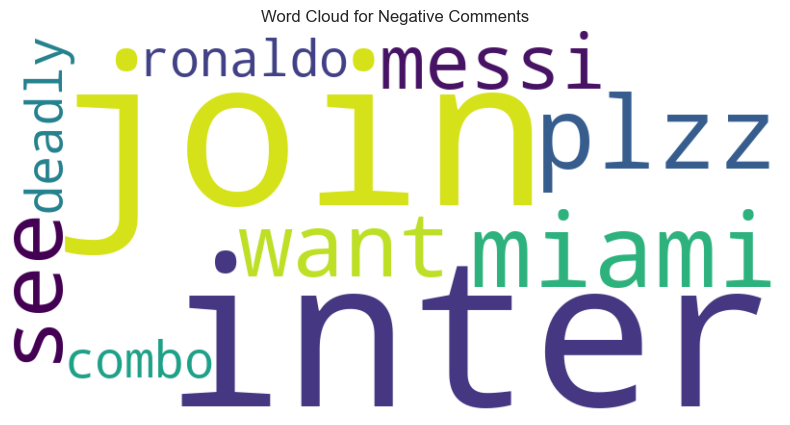

In [53]:
# Word Cloud for Negative Comments
from wordcloud import WordCloud

# Generate word cloud for negative comments
negative_text = ' '.join(negative_comments)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Comments')
plt.axis('off')
plt.show()


### 6.3 TF IDF keyword extraction

to identify the 20 **most significant keywords** in the comments, we used a numerical statistic to reflect how important the words are for this project goal.

In [54]:
from nltk.corpus import words as nltk_words


In [55]:
# List of English words
english_vocab = set(nltk_words.words())

# Combine comments into a single list
all_comments = list(english_comments['text'])

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(all_comments)

# Extract the top keywords
feature_names = tfidf_vectorizer.get_feature_names_out()

# Filter out non-English words
feature_names_english = [word for word in feature_names if word in english_vocab]

# Create a DataFrame with TF-IDF scores for the filtered English words
tfidf_scores = pd.DataFrame(tfidf_matrix.T.todense(), index=feature_names)
tfidf_scores_english = tfidf_scores.loc[feature_names_english]

# Get the top keywords from the filtered DataFrame
top_keywords = tfidf_scores_english.sum(axis=1).sort_values(ascending=False).head(20)
top_keywords.head()

best      65.502401
goat      48.836366
love      31.855083
world     24.027062
player    16.446280
dtype: float64

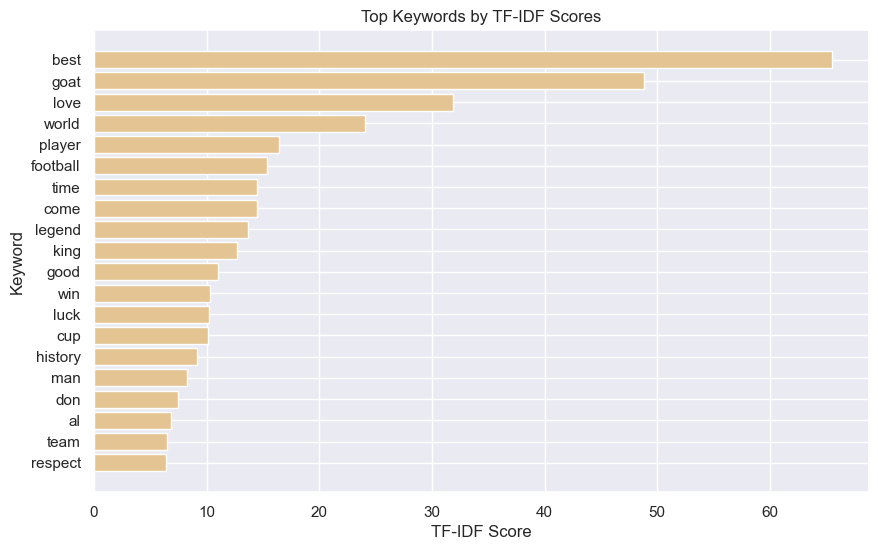

In [56]:
# Visualize
plt.figure(figsize=(10, 6))
bars = plt.barh(top_keywords.index, top_keywords.values, color='#e5c494')
plt.title('Top Keywords by TF-IDF Scores')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keyword')
plt.gca().invert_yaxis() 
plt.show()

## 7. Clustering and Pattern Discovery

English comments are clustered using TF IDF and K Means to identify distinct conversation groups and their dominant themes.


Lets analyse by **clustering comments** and analyzing the **language patterns** within each cluster:

### 7.1 K Means clustering


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [58]:
# Filter English comments
df_english = df_al_nassr[df_al_nassr['is_english']]

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_english['cleaned_text'].dropna())

# Perform KMeans clustering
num_clusters = 5  # Adjust the number of clusters based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign clusters to the dataframe
df_english['cluster'] = kmeans.labels_

# Analyze the top terms in each cluster
def get_top_terms_per_cluster(tfidf_matrix, labels, n_terms=10):
    df = pd.DataFrame(tfidf_matrix.todense()).groupby(labels).mean()
    terms = tfidf_vectorizer.get_feature_names_out()
    top_terms = {}
    for i, row in df.iterrows():
        top_terms[i] = [terms[idx] for idx in row.argsort()[-n_terms:]]
    return top_terms

top_terms_per_cluster = get_top_terms_per_cluster(tfidf_matrix, kmeans.labels_)

# Display the top terms per cluster
for cluster, terms in top_terms_per_cluster.items():
    print(f"Cluster {cluster}: {', '.join(terms)}")

Cluster 0: challenge, euro, portugal, day, win, cristiano, time, goat, 2024, good
Cluster 1: euro, portugal, world, player, day, ronaldoooo, best, goat, football, cristiano
Cluster 2: fan, fans, football, good, hairstyle, don, let, hope, goat, love
Cluster 3: fans, reason, noodle, euros, comment, miami, inter, respect, talk, messi
Cluster 4: cristiano, world, cr7, 2024, league, ronaldoooo, win, nassr, legend, al


### 7.2 Choosing the number of clusters


* First we need to identify the K:

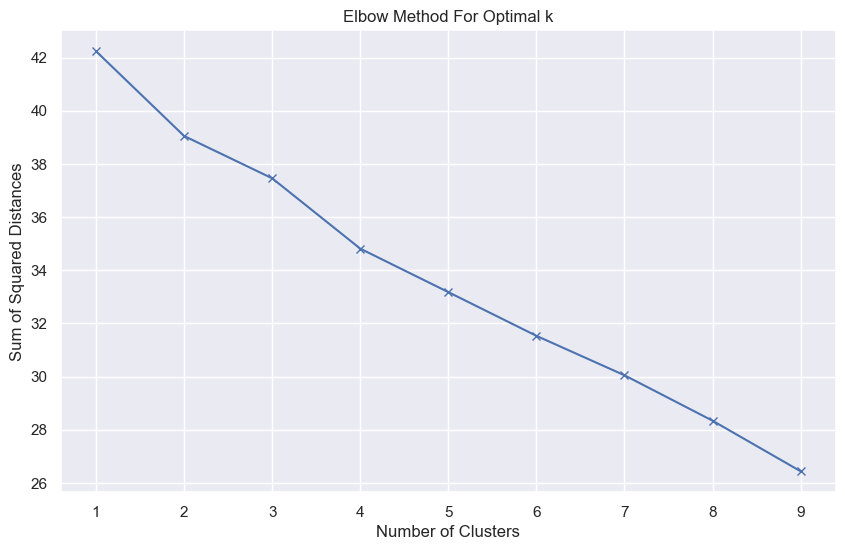

In [59]:
# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
text_vectorized = tfidf_vectorizer.fit_transform(df_al_nassr['cleaned_text'].dropna())

# Determine the optimal number of clusters using the elbow method
sum_of_squared_distances = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(text_vectorized)
    sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

+ Based on the elbow method, K=4.



### 7.3 PCA visualization of clusters


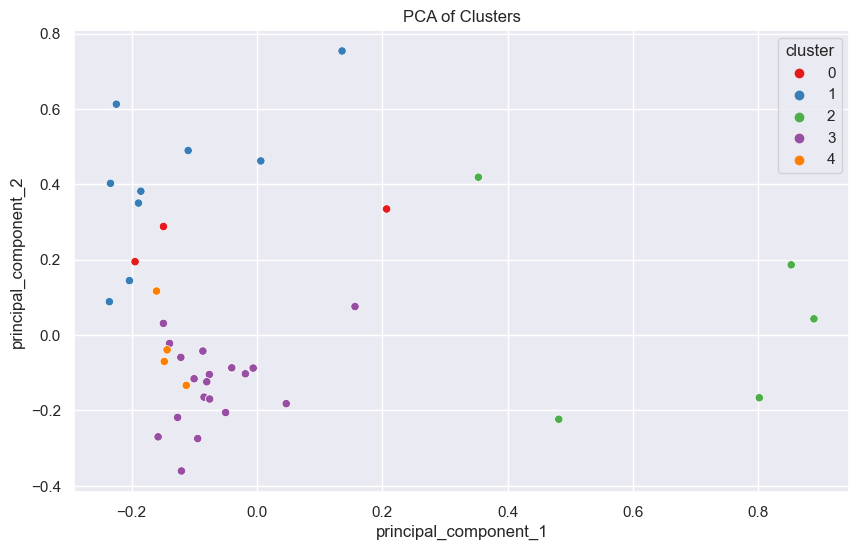

In [63]:
# Set the number of clusters
k = 4

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(tfidf_matrix.toarray())
df_english['principal_component_1'] = principal_components[:, 0]
df_english['principal_component_2'] = principal_components[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', data=df_english, palette='Set1')
plt.title('PCA of Clusters')
plt.show()

### 7.4 Keywords per cluster



In [64]:
# Perform KMeans clustering
num_clusters = 4 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_english['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Function to extract keywords and phrases from comments
def extract_keywords(comments, top_n=10):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(comments)
    if X.shape[1] == 0:
        return []  # Return an empty list if the vocabulary is empty
    feature_array = np.array(vectorizer.get_feature_names_out())
    tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]
    
    top_n_keywords = feature_array[tfidf_sorting][:top_n]
    return top_n_keywords

# Extract keywords for each cluster and put in a DataFrame
keywords_df = pd.DataFrame()
for i in range(num_clusters):
    cluster_comments = df_english[df_english['cluster'] == i]['cleaned_text']
    if not cluster_comments.empty:
        keywords = extract_keywords(cluster_comments)
        keywords_df[f'Cluster {i} Keywords'] = pd.Series(keywords)

keywords_df

Cluster 0 Keywords Cluster 1 Keywords Cluster 2 Keywords Cluster 3 Keywords
0                sad           siuuuuuu               love         ronaldoooo
1                win            ronaldo           alnasser              bombe
2              happy          cristiano               goat             legend
3           portugal              worry            ronaldo                 el
4               euro             direct                 ur              alive
5                day                 hi               sure            talking
6          challenge              hello              speed              nassr
7              doesn              heart             repeat                 al
8            sadness                god                let             europe
9                 al               goat               hope               euro

### 7.5 LDA topics per cluster


In [89]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_english['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Function to perform topic modeling
def perform_topic_modeling(text_series, n_topics=3, n_words=10):
    num_docs = len(text_series)
    min_df_value = 2 if num_docs > 1 else 1
    max_df_value = 0.95 if num_docs > 10 else 1.0
    
    vectorizer = CountVectorizer(max_df=max_df_value, min_df=min_df_value, stop_words='english')
    text_matrix = vectorizer.fit_transform(text_series)
    
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(text_matrix)
    
    words = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        topic_words = [(words[i], topic[i]) for i in topic.argsort()[:-n_words - 1:-1]]
        topics.append(topic_words)
    return topics

# Perform topic modeling for each cluster and store results in a list
topics_list = []
num_clusters = df_english['cluster'].nunique()
for i in range(num_clusters):
    cluster_comments = df_english[df_english['cluster'] == i]['cleaned_text']
    if not cluster_comments.empty:
        topics = perform_topic_modeling(cluster_comments)
        topics_list.append((i, topics))

# Create a DataFrame to hold the topics
topics_data = []

In [91]:
# Perform topic modeling within each cluster and store in a DataFrame
topics_list = []
for i in range(k):
    cluster_comments = df_english[df_english['cluster'] == i]['cleaned_text']
    if not cluster_comments.empty:
        topics = perform_topic_modeling(cluster_comments)
        for j, topic in enumerate(topics):
            topic_words = [word for word, _ in topic]
            topics_list.append({'Cluster': i, f'Topic {j}': ', '.join(topic_words)})

topics_df = pd.DataFrame(topics_list)
topics_df

Cluster                                            Topic 0  \
0         0                     good, ronaldo, 2024, cristiano   
1         0                                                NaN   
2         0                                                NaN   
3         1  football, player, world, cristiano, best, rona...   
4         1                                                NaN   
5         1                                                NaN   
6         2                                goat, ronaldo, love   
7         2                                                NaN   
8         2                                                NaN   
9         3  messi, inter, miami, want, join, plzz, combo, ...   
10        3                                                NaN   
11        3                                                NaN   

                                              Topic 1  \
0                                                 NaN   
1                      cristiano, 2024, good, ronaldo   
2                                                 NaN   
3                                                 NaN   
4   cristiano, ronaldo, goat, best, football, worl...   
5                                                 NaN   
6                                                 NaN   
7                                 love, ronaldo, goat   
8                                                 NaN   
9                                                 NaN   
10  accept, challenge, likes, fans, noodle, commen...   
11                                                NaN   

                                              Topic 2  
0                                                 NaN  
1                                                 NaN  
2                      ronaldo, good, 2024, cristiano  
3                                                 NaN  
4                                                 NaN  
5   cristiano, best, ronaldo, goat, football, worl...  
6                                                 NaN  
7                                                 NaN  
8                                 ronaldo, love, goat  
9                                                 NaN  
10                                                NaN  
11  talk, don, women, palestinian, children, killi...

### 7.6 Word clouds by cluster


Cluster 0: challenge, euro, portugal, day, win, cristiano, time, goat, 2024, good
Cluster 1: euro, portugal, world, player, day, ronaldoooo, best, goat, football, cristiano
Cluster 2: fan, fans, football, good, hairstyle, don, let, hope, goat, love
Cluster 3: fans, reason, noodle, euros, comment, miami, inter, respect, talk, messi
Cluster 4: cristiano, world, cr7, 2024, league, ronaldoooo, win, nassr, legend, al


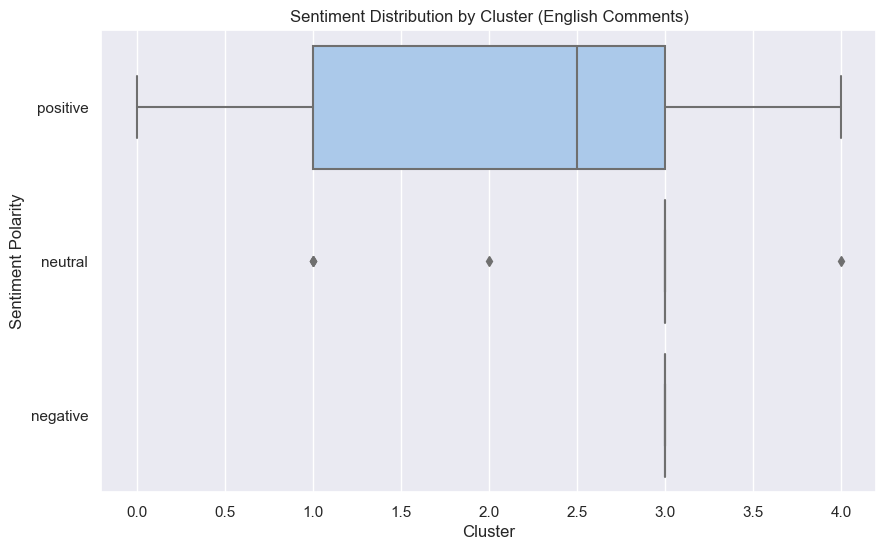

In [92]:
# Assign clusters to the dataframe
df_english['cluster'] = kmeans.labels_

# Analyze the top terms in each cluster
def get_top_terms_per_cluster(tfidf_matrix, labels, n_terms=10):
    df = pd.DataFrame(tfidf_matrix.todense()).groupby(labels).mean()
    terms = tfidf_vectorizer.get_feature_names_out()
    top_terms = {}
    for i, row in df.iterrows():
        top_terms[i] = [terms[idx] for idx in row.argsort()[-n_terms:]]
    return top_terms

top_terms_per_cluster = get_top_terms_per_cluster(tfidf_matrix, kmeans.labels_)

# Display the top terms per cluster
for cluster, terms in top_terms_per_cluster.items():
    print(f"Cluster {cluster}: {', '.join(terms)}")

# Sentiment distribution by cluster for English comments
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='sentiment', data=df_english, palette='pastel')
plt.title('Sentiment Distribution by Cluster (English Comments)')
plt.xlabel('Cluster')
plt.ylabel('Sentiment Polarity')
plt.show()

In [95]:
# Ensure only English comments are used
df_english = df_al_nassr[df_al_nassr['is_english'] == True]

# Perform KMeans clustering
num_clusters = 5  # Adjust the number of clusters based on your data
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_english['cleaned_text'].dropna())

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_english['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Verify the cluster column has been added
df_english.head()

comment_like_count content_type    created_at  created_at_for_fb_app  \
104                 0.0      comment  1.718230e+09             1718230464   
136                 0.0      comment  1.718159e+09             1718159141   
162                 0.0      comment  1.718128e+09             1718128318   
185                 0.0      comment  1.718083e+09             1718082985   
321                 1.0      comment  1.717918e+09             1717918351   

     created_at_utc  did_report_as_spam  has_liked_comment         hashtags  \
104      1718230464               False              False  ['#akwaghmare']   
136      1718159141               False              False               []   
162      1718128318               False              False               []   
185      1718082985               False              False               []   
321      1717918351               False              False               []   

                    id inline_composer_display_condition  ...  \
104  18006653489607367                             never  ...   
136  18084181282421124                             never  ...   
162  17969915459726522                             never  ...   
185  18049915465736982                             never  ...   
321  17998256687415712                             never  ...   

     avatar_media_info.avatar_sticker_cdn_url  \
104                                       NaN   
136                                       NaN   
162                                       NaN   
185                                       NaN   
321                                       NaN   

     avatar_media_info.avatar_sticker_ikid  avatar_media_info.type  \
104                                    NaN                     NaN   
136                                    NaN                     NaN   
162                                    NaN                     NaN   
185                                    NaN                     NaN   
321                                    NaN                     NaN   

    replied_to_comment_id reply_root_comment_id  language  \
104                   NaN                   NaN        en   
136                   NaN                   NaN        en   
162                   NaN                   NaN        en   
185                   NaN                   NaN        en   
321                   NaN                   NaN        en   

                                          cleaned_text sentiment  is_english  \
104                repeat ronaldo love from akwaghmare  positive        True   
136                            ronaldo respect button    neutral        True   
162  i love u ronaldo more than i show speed ur the...  positive        True   
185  to brother ronaldo i really need money can you...  positive        True   
321                            ronaldo fan of football   neutral        True   

     cluster  
104        2  
136        3  
162        2  
185        3  
321        3  

[5 rows x 54 columns]

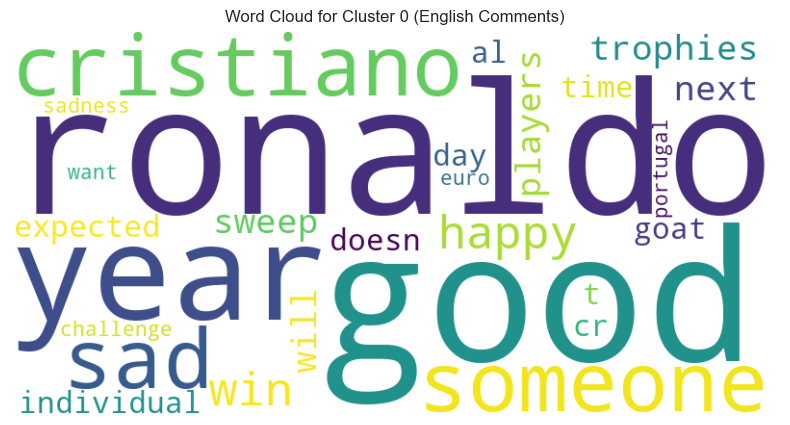

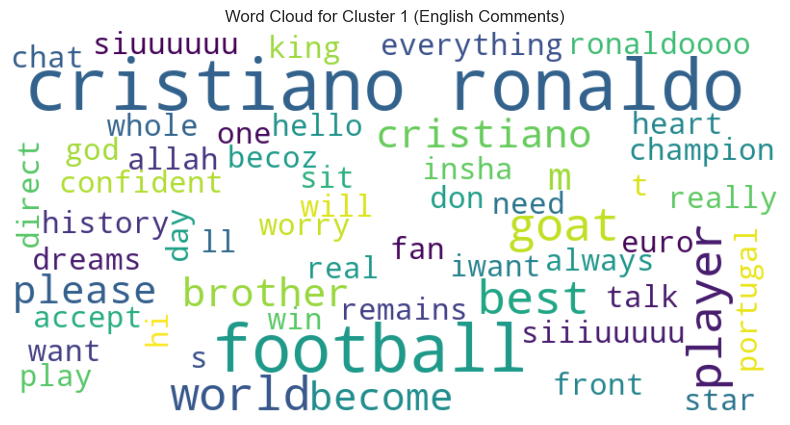

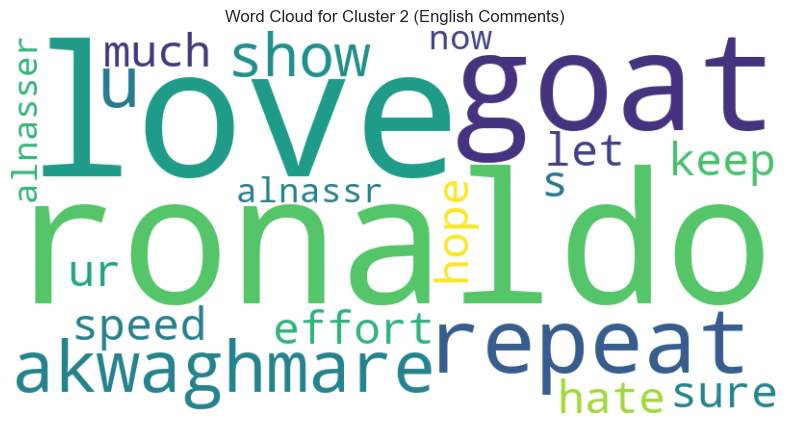

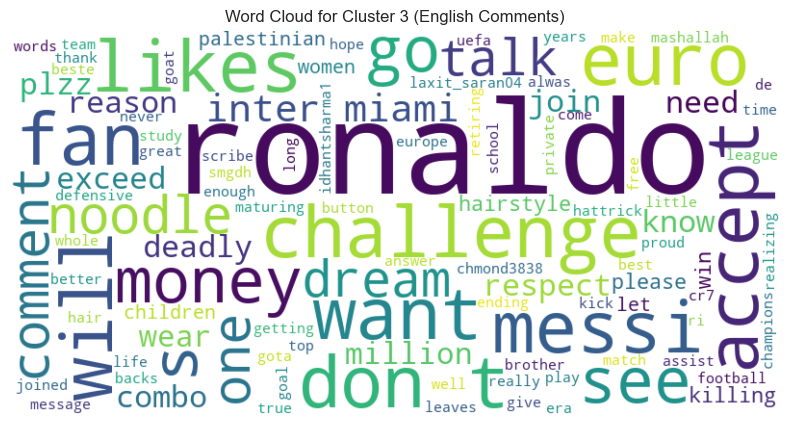

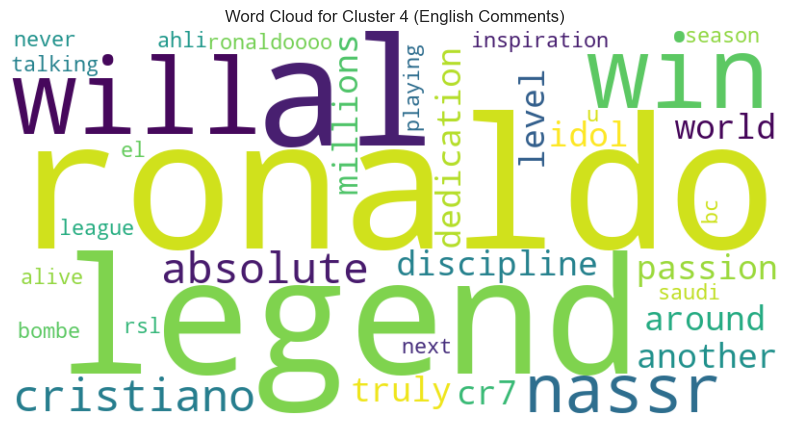

In [102]:
# Generate and plot the word clouds for each cluster
for cluster_num in range(num_clusters):
    cluster_comments = df_english[df_english['cluster'] == cluster_num]['cleaned_text']
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cluster_comments))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_num} (English Comments)')
    plt.axis('off')
    plt.show()

## 8. Conclusion

English Instagram comments about Ronaldo’s move to Al-Nassr are largely supportive. 
The most frequent words and the word cloud are dominated by admiration and legacy terms such as “goat”, “best”, “love”, “ronaldo” and “cristiano”, with repeated mentions of Al-Nassr and comparisons with Messi. 

The sentiment analysis on the English subset shows that neutral comments are the majority, with a clear positive tail and very few strong negative reactions. Many short or emoji-based comments fall into the neutral class, which helps explain that distribution. :contentReference[oaicite:1]{index=1}

Topic modeling (LDA) confirms a small set of dominant narratives.
Key topics focus on Ronaldo’s season and goals at Al-Nassr, fan support and encouragement, and ongoing GOAT debates that often reference Messi. 

Word co-occurrence networks reinforce the contrast between sentiments: 
positive comments cluster around performance, achievements, inspiration and loyalty, while negative comments are sparse and mainly center on hypothetical alternative transfers and Messi or Inter Miami comparisons. :contentReference[oaicite:3]{index=3}

Finally, TF-IDF + KMeans clustering visualized with PCA separates comments into coherent groups: strong admiration and legacy, broad fan encouragement, mixed emotional reactions about performance and future challenges, and a smaller critical cluster. 

Overall, the Instagram discourse in this dataset suggests a broadly positive reception of the transfer, driven by fan admiration and performance-focused narratives, with limited negative backlash.
